In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
email=pd.read_csv("C:\DS projects\spam.csv", encoding='latin_1')
email

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
email.rename(columns={'Category': 'Target', 'Message': 'Email'}, inplace=True)
email.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
email['Target'] = le.fit_transform(email['Target'])

In [5]:
email.isnull().sum()

Target    0
Email     0
dtype: int64

In [6]:
email.duplicated('Email').sum()

415

In [7]:
email = email.drop_duplicates(keep='first')
email.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
email

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


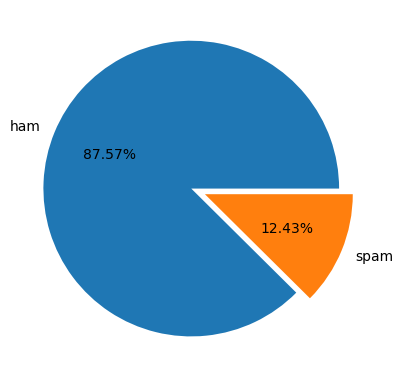

In [9]:
plt.pie(email['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

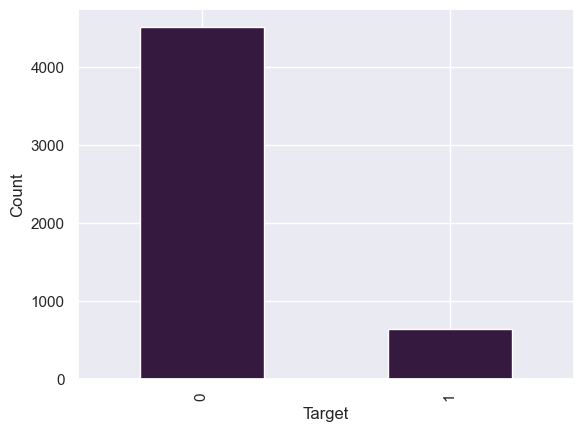

In [10]:
palette=sns.color_palette('rocket')
sns.set(palette=palette)
email['Target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
X = email['Email']
Y = email['Target']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [15]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [16]:
X_train

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can Ã¼ get it...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to Ã¼... Ã wan come then come lor... But i...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Email, Length: 4125, dtype: object

In [17]:
print(X_train_features)

  (0, 6717)	0.48303813512243965
  (0, 6630)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2411)	0.4689535663823655
  (1, 1598)	0.5594126567616489
  (1, 5881)	0.5964494866231046
  (1, 6516)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6860)	0.24488128414489752
  (2, 5084)	0.22967525805125708
  (2, 7384)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2575)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4412)	0.24488128414489752
  (2, 4539)	0.24488128414489752
  (2, 4538)	0.24488128414489752
  (2, 4102)	0.2644704778405301
  (2, 6853)	0.13848562282513652
  (2, 3265)	0.18176623831152225
  (2, 3713)	0.21568440262445418
  (2, 4541)	0.2363176943466334
  (2, 4107)	0.2196593047164816
  :	:
  (4120, 6479)	0.4751891362657192
  (4120, 3193)	0.4285103741434733
  (4120, 3939)	0.39220487670240334
  (4120, 2109)	0.30807173962343376
  (4121, 5990)	0.46138848703500507
  (4121, 6306)	0.46138848703500507
 

In [18]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [19]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9616969696969697


In [20]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9554263565891473
